## Homework 7
### k-Means Clustering “By Hand”
#### 1. Imitate the k-means random initialization part of the algorithm by assigning each observation to a cluster at random.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import pandas as pd
import sklearn
import warnings
import itertools
import sklearn.metrics
warnings.filterwarnings('ignore')

In [48]:
# loading the data
my_df = pd.DataFrame({'X1':[5,8,7,8,3,4,2,3,4,5],
                      'X2':[8,6,5,4,3,2,2,8,9,8]})
# set random seed
np.random.seed(seed=2)
my_df['cluster_3'] = np.random.randint(3,size=10)
my_df

,X1,X2,cluster_3
0,5,8,0
1,8,6,1
2,7,5,0
3,8,4,2
4,3,3,2
5,4,2,0
6,2,2,2
7,3,8,1
8,4,9,1
9,5,8,2


#### 2. Compute the cluster centroid and update cluster assignments for each observation iterativel based on spatial similarity.

In [49]:
# caculate the initial centroids
cluster_groups = my_df.groupby(['cluster_3'])
centroids_3 = cluster_groups.mean()
centroids_3

,X1,X2
cluster_3,,
0,5.333333,5.000000
1,5.000000,7.666667
2,4.500000,4.250000


In [50]:
# iterating K-means based on euclidean distance 
temp_cluster = np.zeros(10)
while np.array_equal(temp_cluster, my_df['cluster_3'].values) == False:
    temp_cluster = my_df['cluster_3'].values
    for i in range(len(my_df)):
        distances = [(k, sp.spatial.distance.euclidean(
        centroids_3.loc[k,['X1','X2']],my_df.loc[i,['X1','X2']]))\
        for k in centroids_3.index]
        my_df.loc[i,'cluster_3'] = sorted(distances, key=lambda x:x[1])[0][0]
    centroids_3 = my_df.groupby(['cluster_3']).mean()
my_df

,X1,X2,cluster_3
0,5,8,1
1,8,6,0
2,7,5,0
3,8,4,0
4,3,3,2
5,4,2,2
6,2,2,2
7,3,8,1
8,4,9,1
9,5,8,1


In [40]:
centroids_3

,X1,X2
cluster,,
0,7.666667,5.000000
1,4.250000,8.250000
2,3.000000,2.333333


#### 3. Present a visual description of the final, converged (stopped) cluster assignments.

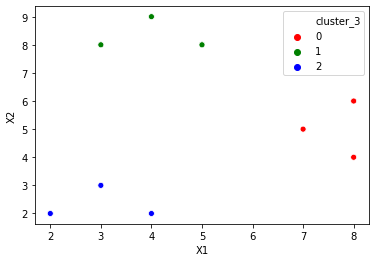

In [51]:
ax = sns.scatterplot('X1','X2', hue='cluster_3', data=my_df, 
                     palette = ['r','g','b'])

We found that two data points are the same. 

#### 4.  Now, repeat the process, but this time initialize at k = 2 and present a final cluster assignment visually next to the previous search at k = 3. 

In [52]:
my_df['cluster_2'] = np.random.randint(2,size=10)
my_df

,X1,X2,cluster_3,cluster_2
0,5,8,1,0
1,8,6,0,0
2,7,5,0,0
3,8,4,0,1
4,3,3,2,1
5,4,2,2,1
6,2,2,2,0
7,3,8,1,0
8,4,9,1,0
9,5,8,1,1


In [53]:
centroids_2 = my_df.groupby(['cluster_2']).mean()
centroids_2

,X1,X2,cluster_3
cluster_2,,,
0,4.833333,6.333333,0.833333
1,5.000000,4.250000,1.250000


In [56]:
# iterating K-means based on euclidean distance 
temp_cluster = np.zeros(10)
while np.array_equal(temp_cluster, my_df['cluster_2'].values) == False:
    temp_cluster = my_df['cluster_2'].values
    for i in range(len(my_df)):
        distances = [(k, sp.spatial.distance.euclidean(
        centroids_2.loc[k,['X1','X2']],my_df.loc[i,['X1','X2']]))\
        for k in centroids_2.index]
        my_df.loc[i,'cluster_2'] = sorted(distances, key=lambda x:x[1])[0][0]
    centroids_2 = my_df.groupby(['cluster_2']).mean()
my_df

,X1,X2,cluster_3,cluster_2
0,5,8,1,0
1,8,6,0,0
2,7,5,0,1
3,8,4,0,1
4,3,3,2,1
5,4,2,2,1
6,2,2,2,1
7,3,8,1,0
8,4,9,1,0
9,5,8,1,0


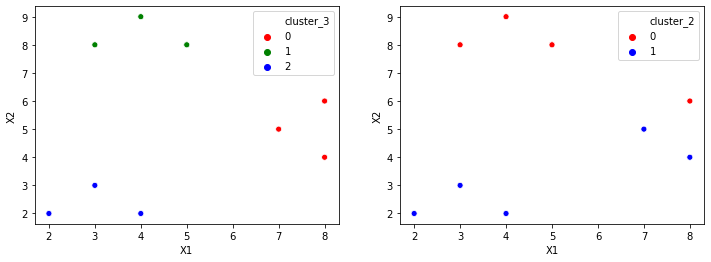

In [61]:
fig, axes = plt.subplots(1,2,figsize=[12,4])
sns.scatterplot('X1','X2', hue='cluster_3', data=my_df, 
                 ax= axes[0], palette = ['r','g','b'])
sns.scatterplot('X1','X2', hue='cluster_2', data=my_df, 
                 ax= axes[1], palette = ['r','b'])
plt.show()

#### 5. Did your initial hunch of 3 clusters pan out, or would other values of k, like 2, fit these data better? Why or why not?

In [63]:
# calculate some statistics
print('2 clusters silhouette score:', 
      sklearn.metrics.silhouette_score(my_df[['X1','X2']], my_df['cluster_2']))
print('3 clusters silhouette score:', 
      sklearn.metrics.silhouette_score(my_df[['X1','X2']], my_df['cluster_3']))

2 clusters silhouette score: 0.3952155924973207
3 clusters silhouette score: 0.6924487175226476


Judging the reuslts of different cluster numbers requires clustering metrics like the silhouette score. From the silhouette score presented above, we can see that in this case, 3 clusters is a better choice than 2 because it yields a higher score. In silhouette analysis, when the score is more close to 1, it suggests that the clusters are more far away from each other. So, the higher the score is, the more reliable the results would usually be.

### Application-Dimension Reduction
#### 6. Perform PCA on the dataset and plot the observations on the first and second principal components. Describe your results, e.g.,
- What variables appear strongly correlated on the first principal component?
- What about the second principal component?

In [ ]:
# loading the data
wiki_df = pd.read_csv('data/wiki.csv')
wiki_df

In [3]:
from sklearn.preprocessing import StandardScaler as scaler
# scale each feature
feature_scalered = scaler().fit_transform(wiki_df)
feature_scalered

array([[-0.28718866, -0.86413245,  1.14257407, ..., -0.15171652,
        -0.05006262, -2.1618878 ],
       [-0.02204045, -0.86413245,  1.14257407, ..., -0.15171652,
        -0.05006262, -2.1618878 ],
       [-0.68491098, -0.86413245,  1.14257407, ..., -0.15171652,
        -0.05006262, -2.1618878 ],
       ...,
       [ 0.9059783 ,  1.15723001,  1.14257407, ..., -0.15171652,
        -0.05006262,  0.46255869],
       [-0.02204045,  1.15723001, -0.87521678, ..., -0.15171652,
        -0.05006262,  0.46255869],
       [ 0.37568187,  1.15723001,  1.14257407, ..., -0.15171652,
        -0.05006262,  0.46255869]])

In [7]:
# PCA process
from sklearn.decomposition import PCA
wiki_pca = PCA(n_components=2)
wiki_pca.fit(feature_scalered)
pca_matrix = wiki_pca.transform(feature_scalered)
pca_matrix

array([[-0.15021634, -1.98200441],
       [-3.31402027, -0.79193628],
       [-4.68248356, -0.31242113],
       ...,
       [ 1.44945505, -0.17056738],
       [-2.88828204,  2.72105659],
       [-7.00065644,  2.80537201]])

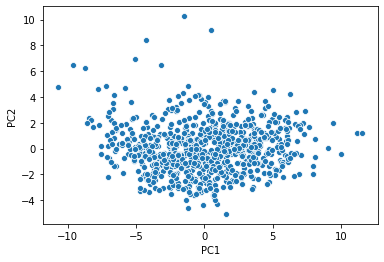

In [8]:
# visualize
wiki_df['PC1'] = pca_matrix[:,0]
wiki_df['PC2'] = pca_matrix[:,1]
ax = sns.scatterplot('PC1','PC2', data=wiki_df)

In [9]:
PC1 = wiki_pca.components_[0]
PC1_loadings = []
for index, loadings in enumerate(PC1):
    PC1_loadings.append((wiki_df.columns[index], loadings))
sorted_PC1_loadings = sorted(PC1_loadings, key=lambda x:abs(x[1]), reverse=True)
sorted_PC1_loadings[:5]

[('bi2', 0.2309239642540114),
 ('bi1', 0.22619306054013577),
 ('use3', 0.21880924498935447),
 ('use4', 0.2145583971189249),
 ('pu3', 0.21086256677664603)]

In [10]:
PC2 = wiki_pca.components_[1]
PC2_loadings = []
for index, loadings in enumerate(PC2):
    PC2_loadings.append((wiki_df.columns[index], loadings))
sorted_PC2_loadings = sorted(PC2_loadings, key=lambda x:abs(x[1]), reverse=True)
sorted_PC2_loadings[:5]

[('peu1', -0.27174293617737094),
 ('inc1', -0.24543832450284958),
 ('sa3', -0.2423294474809012),
 ('sa1', -0.2299278304788027),
 ('exp4', 0.22850119792973378)]

Based on the above loadings, we can see that for PC1, the most correlated variables are 'bi2', 'bi1', 'use3', 'use4' and 'pu3'. For PC2, the most correlated variables are 'peu1', 'inc1', 'sa3', 'sa1' and 'exp4'. 

#### 7. Calculate the proportion of variance explained (PVE) and the cumulative PVE for all the principal components. Approximately how much of the variance is explained by the first two principal components?

In [11]:
wiki_pca.explained_variance_ratio_

array([0.22810628, 0.06372475])

In [12]:
print("About {}% of all the variance is explained".format(
    round(wiki_pca.explained_variance_ratio_.sum()*100, 4)))

About 29.1831% of all the variance is explained


#### 8. Perform t-SNE on the dataset and plot the observations on the first and second dimensions. Describe your results.

In [13]:
from sklearn.manifold import TSNE
wiki_tsne = TSNE(n_components=2)
tsne_matrix = wiki_tsne.fit_transform(feature_scalered)
tsne_matrix

array([[  7.728328,  29.642967],
       [  0.938236,  26.266901],
       [ -9.586262, -23.530832],
       ...,
       [ 10.870317,   6.250696],
       [-10.459571, -11.736126],
       [-21.68648 ,  14.245586]], dtype=float32)

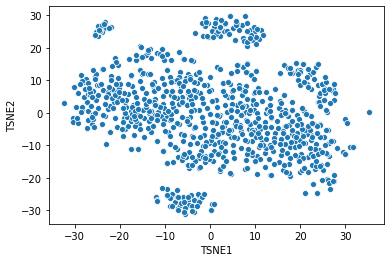

In [14]:
# visualize
wiki_df['TSNE1'] = tsne_matrix[:,0]
wiki_df['TSNE2'] = tsne_matrix[:,1]
ax = sns.scatterplot('TSNE1','TSNE2', data=wiki_df)

In [15]:
TSNE1_embedding = []
for i in wiki_df.drop(columns=['PC1','PC2','TSNE1','TSNE2']).columns:
    corr_matrix = np.corrcoef(wiki_df[i], wiki_df['TSNE1'])
    TSNE1_embedding.append((i, corr_matrix[0,1]))
sorted_TSNE1_embeddings = sorted(TSNE1_embedding, key=lambda x:abs(x[1]), reverse=True)
sorted_TSNE1_embeddings[:5]

[('bi2', 0.7035460105376687),
 ('use3', 0.6837103908652066),
 ('bi1', 0.6835316738144661),
 ('pu3', 0.6653207234434859),
 ('use4', 0.6640753391705723)]

In [16]:
TSNE2_embedding = []
for i in wiki_df.drop(columns=['PC1','PC2','TSNE1','TSNE2']).columns:
    corr_matrix = np.corrcoef(wiki_df[i], wiki_df['TSNE2'])
    TSNE2_embedding.append((i, corr_matrix[0,1]))
sorted_TSNE2_embeddings = sorted(TSNE2_embedding, key=lambda x:abs(x[1]), reverse=True)
sorted_TSNE2_embeddings[:5]

[('uoc_position_Assistant', -0.4437569617333519),
 ('vis3', -0.37429220731855023),
 ('uoc_position_Associate', 0.3739764767110721),
 ('use3', -0.36035854930148387),
 ('use4', -0.35803636474883993)]

The dimension reduction result of t-sne is quite different from that of PCA, and this would be related to the differente in the nonlinear construction of the components as well as different importance assignment to each feature variables as being displayed above. Interestingly, we found that the top 5 variables for both dimension reduction methods are the same, which might suggest the importance of these 5 variables in deciding the variance within samples.

### Application-Clustering
#### 9. Perform k-means clustering with k = 2, 3, 4. Be sure to scale each feature (i.e.,mean zero and standard deviation one). Plot the observations on the first and second principal components from PCA and color-code each observation based on their cluster membership. Discuss your results.

In [17]:
from sklearn.cluster import KMeans
wiki_df['cluster_2'] = KMeans(n_clusters=2, random_state=0).fit(feature_scalered).labels_
wiki_df['cluster_3'] = KMeans(n_clusters=3, random_state=0).fit(feature_scalered).labels_
wiki_df['cluster_4'] = KMeans(n_clusters=4, random_state=0).fit(feature_scalered).labels_

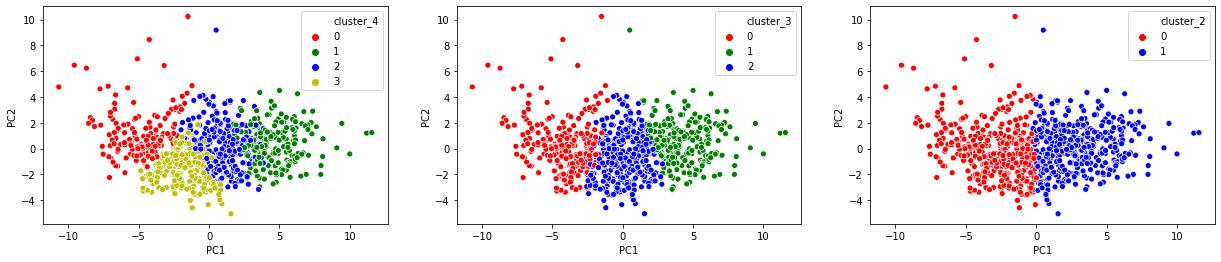

In [18]:
# visualize
fig, axes = plt.subplots(1,3,figsize=[21,4])
sns.scatterplot('PC1','PC2', hue='cluster_4', data=wiki_df, 
                 ax= axes[0], palette = ['r','g','b','y'])
sns.scatterplot('PC1','PC2', hue='cluster_3', data=wiki_df, 
                 ax= axes[1], palette = ['r','g','b'])
sns.scatterplot('PC1','PC2', hue='cluster_2', data=wiki_df, 
                 ax= axes[2], palette = ['r','b'])
plt.show()

From the above plots, we see that PC1 nearly plays a decisive role in the clustering results, because the clusters are almost distinguished by the values of PC1. As a comparison, the values of PC2 do not vary as much as those of PC1 among different clusters. I think this phenomenon also verifies the coherence of the first component of both PCA and TSNE, suggesting that the variables contributing a lot to this component are truely impactful in distinguishing different types of data.

#### 10. Use the elbow method, average silhouette, and/or gap statistic to identify the optimal number of clusters based on k-means clustering with scaled features.

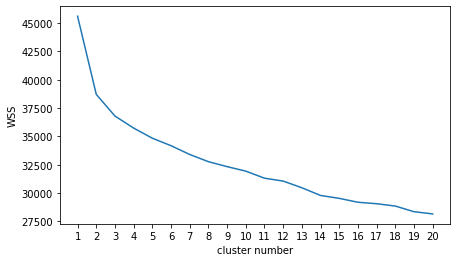

In [46]:
# Using the elbow method with WSS
elbow = []
for i in range(1,21):
    elbow.append((i,
    KMeans(n_clusters=i, random_state=0).fit(feature_scalered).inertia_))

# visualize
plt.rcParams['figure.figsize'] = [7,4]
plt.plot([x[0] for x in elbow], [x[1] for x in elbow])
plt.xticks([x[0] for x in elbow])
plt.xlabel('cluster number')
plt.ylabel('WSS')
plt.show()

Using the elbow method, we are likely to think that number 2 or 3 is the optimal number for clustering.

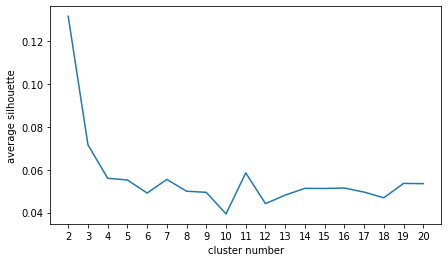

In [52]:
# Using the elbow method with average silhouette
silhouette = []
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(feature_scalered)
    silhouette.append((i,sklearn.metrics.silhouette_score(
    feature_scalered, kmeans.labels_)))

# visualize
plt.rcParams['figure.figsize'] = [7,4]
plt.plot([x[0] for x in silhouette], [x[1] for x in silhouette])
plt.xticks([x[0] for x in silhouette])
plt.xlabel('cluster number')
plt.ylabel('average silhouette')
plt.show()

In [54]:
sorted(silhouette, key=lambda x:x[1], reverse=True)[:5]

[(2, 0.13155572775990604),
 (3, 0.07164069039826482),
 (11, 0.05853518792773934),
 (4, 0.056024706736369334),
 (7, 0.055480874428546795)]

From the result of silhouette scores, we find that the optimal cluster number is 2, since it gains the highest score. 

#### 11. Visualize the results of the optimal ˆk-means clustering model. First use the first and second principal components from PCA, and color-code each observation based on their cluster membership. Next use the first and second dimensions from t-SNE, and color-code each observation based on their cluster membership. Describe your results. How do your interpretations differ between PCA and t-SNE? 

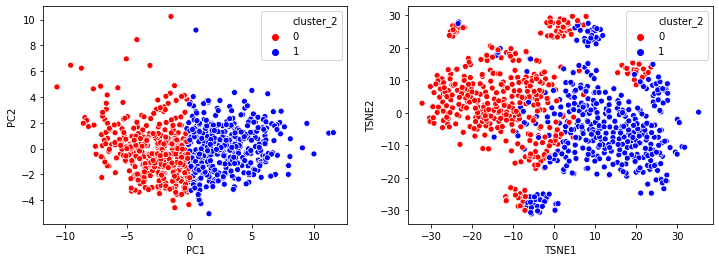

In [57]:
# visualize
fig, axes = plt.subplots(1,2,figsize=[12,4])
sns.scatterplot('PC1','PC2', hue='cluster_2', data=wiki_df, 
                 ax= axes[0], palette = ['r','b'])
sns.scatterplot('TSNE1','TSNE2', hue='cluster_2', data=wiki_df, 
                 ax= axes[1], palette = ['r','b'])
plt.show()

Based on the results of elbow method and silhouette scores, I use the number 2 as the optimal cluster number setting to visualize. When we project the data points to the 2 principle components, we couls see that the boundary between the two clusters are almost vertically linear, suggesting that PC1 dominate the variance in the data. For the t-SNE graph, the boundary is less explicit and looks more non-linear, but still has some similarity to that made by PCA. For example, the data points in cluster 0 are majorly have a negative value on the first PC/dimension in both methods. The similarity might be related to the truth that these two first components attached great importance to similar feature variables, while the difference could be from two aspects:

1. The second PC/dimension of these two methods have innegligible difference in composition.
2. Even if the first PC/dimension have similar composition, how these variables are organized to form the PC/dimension is quite different (One is linear and the other is not).